In [141]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly_express as px
import nltk

In [3]:
df = pd.read_csv('../sentiment_analysis/sentiment_data.csv')
df.head()

,Unnamed: 0,index,profile_name,user_reviews,summary,stars,rating_date,text,label,score
0,0,0,peterbH5107W,16,Excellent food and cabaret,5,30/10/2022,We were recommended to go here while in Paphos...,POSITIVE,0.999848
1,1,1,relinquishedall,8,"Music, Palinka, decent food",5,29/10/2022,"Had some food and a few beers, as a band playe...",POSITIVE,0.999825
2,2,2,audreysouthampton,5,Great evening,5,28/10/2022,"What a lovely evening, the staff couldn’t of b...",POSITIVE,0.999848
3,3,3,pauladK1021PE,1,LOVE LOVE LOVE Fat Mamas,5,23/10/2022,2nd night out of 4 for us. Had to go back as o...,POSITIVE,0.999662
4,4,4,Le5ley63,30,Great night,5,22/10/2022,"Food really good, fantastic service, and dance...",POSITIVE,0.999805


In [4]:
df.drop(columns=['Unnamed: 0', 'index'], inplace=True)
df.head()

,profile_name,user_reviews,summary,stars,rating_date,text,label,score
0,peterbH5107W,16,Excellent food and cabaret,5,30/10/2022,We were recommended to go here while in Paphos...,POSITIVE,0.999848
1,relinquishedall,8,"Music, Palinka, decent food",5,29/10/2022,"Had some food and a few beers, as a band playe...",POSITIVE,0.999825
2,audreysouthampton,5,Great evening,5,28/10/2022,"What a lovely evening, the staff couldn’t of b...",POSITIVE,0.999848
3,pauladK1021PE,1,LOVE LOVE LOVE Fat Mamas,5,23/10/2022,2nd night out of 4 for us. Had to go back as o...,POSITIVE,0.999662
4,Le5ley63,30,Great night,5,22/10/2022,"Food really good, fantastic service, and dance...",POSITIVE,0.999805


In [9]:
df['user_reviews'] = df['user_reviews'].str.replace(',','')
df['user_reviews'] = df['user_reviews'].apply(pd.to_numeric).astype('Int64')
df.dtypes

profile_name     object
user_reviews      Int64
summary          object
stars             int64
rating_date      object
text             object
label            object
score           float64
dtype: object

In [12]:
df['rating_date'] = df['rating_date'].apply(pd.to_datetime, dayfirst=True)
df.dtypes

profile_name            object
user_reviews             Int64
summary                 object
stars                    int64
rating_date     datetime64[ns]
text                    object
label                   object
score                  float64
dtype: object

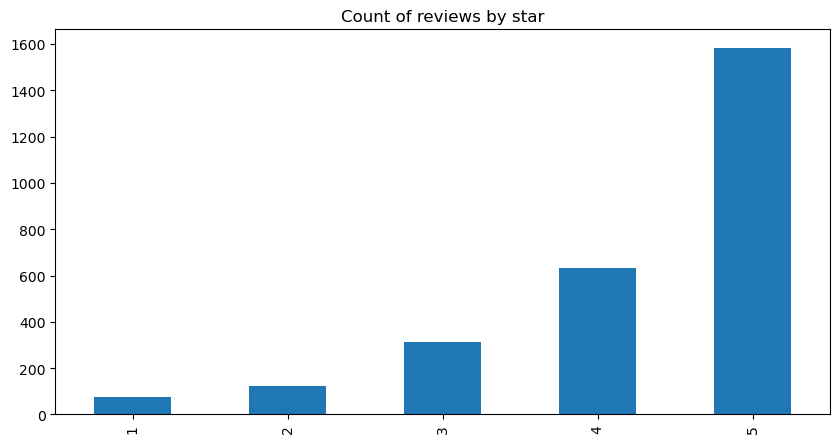

In [24]:
ax = df['stars'].value_counts().sort_index().plot(
                                                    kind = 'bar',
                                                    title = 'Count of reviews by star',
                                                    figsize = (10, 5)
                                                )
plt.show()

In [82]:
year_group_label_df = year_group_label.unstack().rename(columns={
                                    year_group_label.index.levels[1][0] : 'Negative',
                                    year_group_label.index.levels[1][1] : 'Positive' 
                                    })
year_group_label_df = year_group_label_df.rename_axis('Year').reset_index()
year_group_label_df

label,Year,Negative,Positive
0,2010,5,5
1,2011,11,47
2,2012,50,186
3,2013,50,180
4,2014,41,171
5,2015,71,368
6,2016,85,344
7,2017,75,327
8,2018,36,274
9,2019,29,224


In [83]:
year_group_label_df['Negative %'] = year_group_label_df['Negative'] / (year_group_label_df['Negative'] + year_group_label_df['Positive']) * 100
year_group_label_df['Positive %'] = year_group_label_df['Positive'] / (year_group_label_df['Negative'] + year_group_label_df['Positive']) * 100


In [99]:
year_group_label_df

label,Year,Negative,Positive,Negative %,Positive %
0,2010,5,5,50.000000,50.000000
1,2011,11,47,18.965517,81.034483
2,2012,50,186,21.186441,78.813559
3,2013,50,180,21.739130,78.260870
4,2014,41,171,19.339623,80.660377
5,2015,71,368,16.173121,83.826879
6,2016,85,344,19.813520,80.186480
7,2017,75,327,18.656716,81.343284
8,2018,36,274,11.612903,88.387097
9,2019,29,224,11.462451,88.537549


In [101]:
year_group_label_df.sort_values(by='Positive %', ascending=False)

label,Year,Negative,Positive,Negative %,Positive %
10,2020,3,31,8.823529,91.176471
11,2021,4,35,10.256410,89.743590
9,2019,29,224,11.462451,88.537549
8,2018,36,274,11.612903,88.387097
5,2015,71,368,16.173121,83.826879
7,2017,75,327,18.656716,81.343284
1,2011,11,47,18.965517,81.034483
4,2014,41,171,19.339623,80.660377
6,2016,85,344,19.813520,80.186480
2,2012,50,186,21.186441,78.813559


In [103]:
year_group_label_df.sort_values(by='Negative %', ascending=False)

label,Year,Negative,Positive,Negative %,Positive %
0,2010,5,5,50.000000,50.000000
12,2022,17,54,23.943662,76.056338
3,2013,50,180,21.739130,78.260870
2,2012,50,186,21.186441,78.813559
6,2016,85,344,19.813520,80.186480
4,2014,41,171,19.339623,80.660377
1,2011,11,47,18.965517,81.034483
7,2017,75,327,18.656716,81.343284
5,2015,71,368,16.173121,83.826879
8,2018,36,274,11.612903,88.387097


In [115]:
fig = px.bar(year_group_label_df, x='Year', y=['Positive %', 'Negative %'], barmode='group', template='plotly_dark')
fig.show()

In [119]:
fig = px.bar(year_group_label_df, x='Year', y=['Positive %', 'Negative %'], barmode='stack', template='plotly_dark')

fig.update_layout(title='Sentiment by year', xaxis_title='Year', yaxis_title='Sentiment')

fig.show()

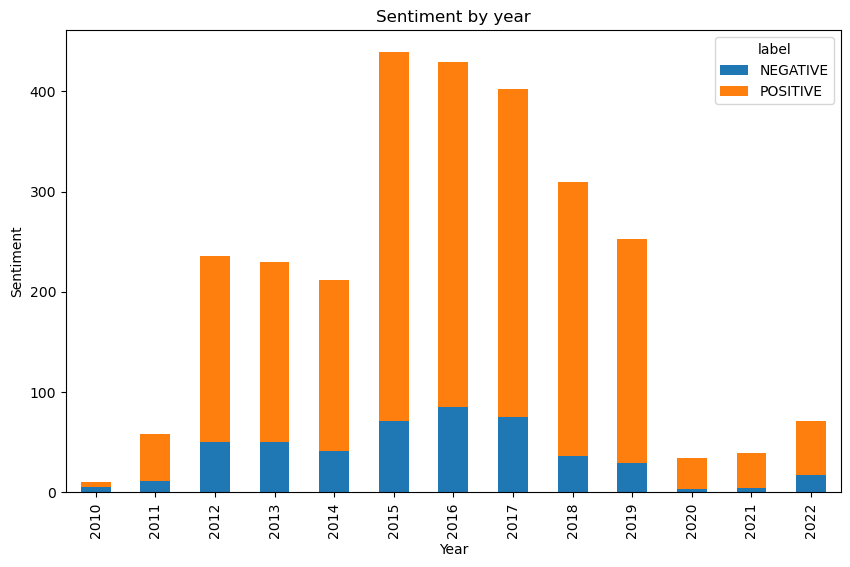

In [97]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10, 6))

# Plot the stacked bar chart
year_group_label.unstack().plot(kind='bar', stacked=True, ax=ax)

# Set the chart title, x and y labels
ax.set_title('Sentiment by year')
ax.set_xlabel('Year')
ax.set_ylabel('Sentiment')

plt.show()


In [135]:
month_group_sent = df.groupby(df['rating_date'].dt.month)['label'].value_counts()
month_group_sent = month_group_sent.unstack().rename(columns={
                                    month_group_sent.index.levels[1][0] : 'Negative',
                                    month_group_sent.index.levels[1][1] : 'Positive' 
                                    })
month_group_sent = month_group_sent.rename_axis('Month').reset_index()
month_group_sent.rename_axis('index', inplace=True)
month_group_sent

label,Month,Negative,Positive
index,,,
0,1,18,84
1,2,18,100
2,3,25,82
3,4,28,130
4,5,33,196
5,6,38,230
6,7,72,319
7,8,78,394
8,9,67,284


In [137]:
fig = px.bar(month_group_sent, x='Month', y=['Positive', 'Negative'], barmode='group', template='plotly_dark')
fig.show()

# so the restaurant opens in April or May and closes on the last day of October, so that's why we see this result

In [138]:
month_group_sent['Negative %'] = month_group_sent['Negative'] / (month_group_sent['Negative'] + month_group_sent['Positive']) * 100
month_group_sent['Positive %'] = month_group_sent['Positive'] / (month_group_sent['Negative'] + month_group_sent['Positive']) * 100


In [139]:
month_group_sent

label,Month,Negative,Positive,Negative %,Positive %
index,,,,,
0,1,18,84,17.647059,82.352941
1,2,18,100,15.254237,84.745763
2,3,25,82,23.364486,76.635514
3,4,28,130,17.721519,82.278481
4,5,33,196,14.410480,85.589520
5,6,38,230,14.179104,85.820896
6,7,72,319,18.414322,81.585678
7,8,78,394,16.525424,83.474576
8,9,67,284,19.088319,80.911681


In [140]:
fig = px.bar(month_group_sent, x='Month', y=['Positive %', 'Negative %'], barmode='group', template='plotly_dark')
fig.show()


In [148]:
nltk.download('stopwords')
nltk.download('punkt')


[nltk_data] Downloading package stopwords to
[nltk_data]     /home/e-saakidis/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /home/e-saakidis/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [143]:
all_reviews = ' '.join(df['text'])

In [149]:
tokens = nltk.word_tokenize(all_reviews)

In [161]:
stop_words = set(nltk.corpus.stopwords.words('english'))
tokens = [token for token in tokens if not token in stop_words and token.isalpha() and len(token) > 3]


In [162]:
freq_dist = nltk.FreqDist(tokens)

In [163]:
most_common = freq_dist.most_common(20)

In [164]:
word_df = pd.DataFrame(most_common, columns=['Word', 'Frequency'])

In [165]:
word_df

,Word,Frequency
0,food,2271
1,good,1512
2,entertainment,1077
3,great,1071
4,staff,991
5,portions,912
6,place,839
7,restaurant,735
8,service,645
9,would,638


In [166]:
tokens2 = [token for token in tokens if not token in stop_words and token.isalpha() and len(token) > 5]

In [183]:
freq_list2 = nltk.FreqDist(tokens2)

In [184]:
most_common_word = freq_list2.most_common(20)

In [185]:
common_word_df = pd.DataFrame(most_common_word, columns=['Word', 'Frequency'])

In [186]:
common_word_df

,Word,Frequency
0,entertainment,1077
1,portions,912
2,restaurant,735
3,service,645
4,really,492
5,friendly,476
6,evening,394
7,Paphos,387
8,portion,383
9,recommend,365


In [173]:
from wordcloud import WordCloud

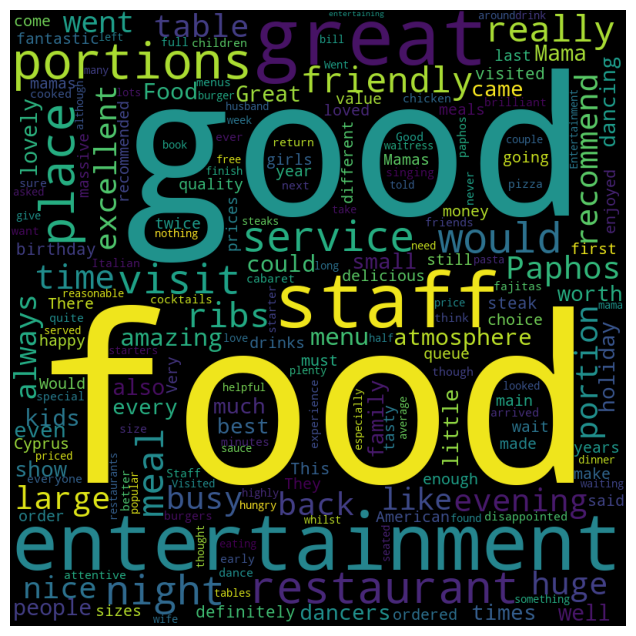

In [182]:
wordcloud = WordCloud(width=800, height=800, background_color='black', min_font_size=10).generate_from_frequencies(freq_dist)

plt.figure(figsize=(8,8))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

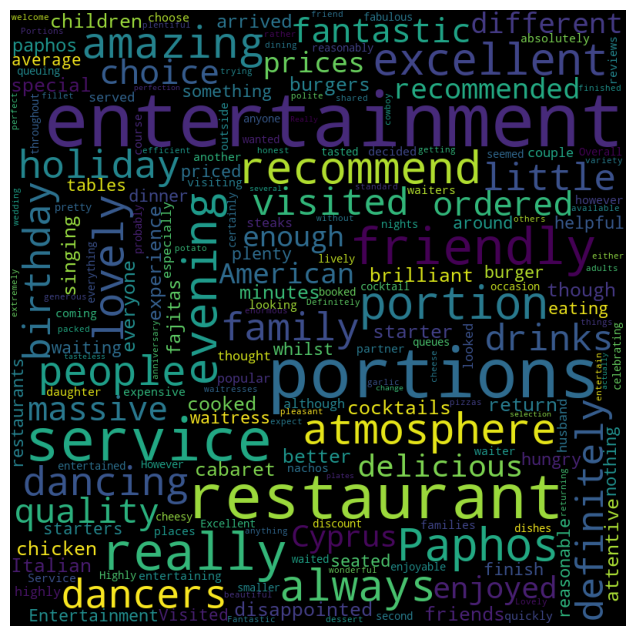

In [191]:
wordcloud = WordCloud(width=800, height=800, background_color='black', min_font_size=10).generate_from_frequencies(freq_list2)

plt.figure(figsize=(8,8))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [201]:
df.head()

,profile_name,user_reviews,summary,stars,rating_date,text,label,score
0,peterbH5107W,16,Excellent food and cabaret,5,2022-10-30,We were recommended to go here while in Paphos...,POSITIVE,0.999848
1,relinquishedall,8,"Music, Palinka, decent food",5,2022-10-29,"Had some food and a few beers, as a band playe...",POSITIVE,0.999825
2,audreysouthampton,5,Great evening,5,2022-10-28,"What a lovely evening, the staff couldn’t of b...",POSITIVE,0.999848
3,pauladK1021PE,1,LOVE LOVE LOVE Fat Mamas,5,2022-10-23,2nd night out of 4 for us. Had to go back as o...,POSITIVE,0.999662
4,Le5ley63,30,Great night,5,2022-10-22,"Food really good, fantastic service, and dance...",POSITIVE,0.999805


In [205]:
target_words = ['pizza', 'burger', 'fajitas', 'fries', 'potato', 'mushroom', 'fish', 'cocktail', 'margarita', 'chicken', 'salad', 'side', 'starter', 'prawn']

word_counts = {}
for word in target_words:
    word_counts[word] = {'POSITIVE': 0, 'NEGATIVE': 0}

for index, row in df.iterrows():
    text = row['text'].lower()
    
    for word in target_words:
        if word in text:
            sentiment = row['label']
            word_counts[word][sentiment] += 1

menu_sentiment_data = []
for word in target_words:
    menu_sentiment_data.append({'Food': word, 'Sentiment': 'Positive', 'Count': word_counts[word]['POSITIVE']})
    menu_sentiment_data.append({'Food': word, 'Sentiment': 'Negative', 'Count': word_counts[word]['NEGATIVE']})

menu_sentiment = pd.DataFrame(menu_sentiment_data)



In [218]:
menu_sentiment

,Food,Sentiment,Count
0,pizza,Positive,108
1,pizza,Negative,49
2,burger,Positive,191
3,burger,Negative,54
4,fajitas,Positive,96
5,fajitas,Negative,29
6,fries,Positive,18
7,fries,Negative,8
8,potato,Positive,25
9,potato,Negative,17


In [209]:
fig = px.bar(menu_sentiment, x='Food', y='Count', color='Sentiment',
             barmode='group', title='Menu Sentiment', template='plotly_dark')
fig.show()